
Primero medimos el objeto que mide unos 11 cm:

<img src="../code/foto/webcam_screenshot_27.04.2023.png" alt="Texto alternativo" width="300" height="200">


Despues calculamos f: Mis disculpas por la confusión. Aquí tienes la ecuación resultante con un carácter de escape:

Para despejar f de la ecuación $u = f \frac{X}{Z}$, podemos seguir los siguientes pasos:

   $$f = u \frac{Z}{X}$$

Dado que $u = 190\, \text{pix}$, $Z = 30 \, \text{cm}$ y $X = 11 \, \text{cm}$, podemos reemplazar estos valores en la ecuación $f = u \frac{Z}{X}$:

$$f = 190 \, \text{pix} \cdot \frac{30 \, \text{cm}}{11 \, \text{cm}}$$

Realizando la operación, obtenemos:

$$f = 190 \, \text{pix} \cdot \frac{30}{11} \approx 518\, \text{pix}$$

Por lo tanto, con los valores proporcionados, $f \approx 518\, \text{pix}$.

Ahora calculamos el FOV Sabiendo que la resolution de la camara es de 640x480:



$$\tan\left(\frac{FOV}{2}\right) = \frac{\frac{640}{2}}{518}$$

Simplificando la expresión, tenemos:

$$\tan\left(\frac{FOV}{2}\right) = \frac{320}{518} \approx 63.4$$


Para el fov horizontal:


$$\tan\left(\frac{FOV}{2}\right) = \frac{\frac{480}{2}}{518}$$

Simplificando la expresión, tenemos:

$$\tan\left(\frac{FOV}{2}\right) = \frac{240}{518} \approx 49.71$$







In [1]:
!python  ../code/calibrate/calibrate.py "../code/calibrate/calibracion/*.png"



processing ../code/calibrate/calibracion/20230427-182417.png...
chessboard not found
processing ../code/calibrate/calibracion/20230427-182421.png...
ok
processing ../code/calibrate/calibracion/20230427-182426.png...
ok
processing ../code/calibrate/calibracion/20230427-182428.png...
ok
processing ../code/calibrate/calibracion/20230427-182431.png...
ok
processing ../code/calibrate/calibracion/20230427-182432.png...
ok
processing ../code/calibrate/calibracion/20230427-182435.png...
ok
processing ../code/calibrate/calibracion/20230427-182437.png...
chessboard not found
processing ../code/calibrate/calibracion/20230427-182452.png...
chessboard not found
processing ../code/calibrate/calibracion/20230427-182454.png...
chessboard not found
processing ../code/calibrate/calibracion/20230427-182457.png...
ok
processing ../code/calibrate/calibracion/20230427-182458.png...
chessboard not found
processing ../code/calibrate/calibracion/20230427-182501.png...
chessboard not found
processing ../code/ca

Obtenemos una f de 481 píxeles.
Que se encuentra dentro del rango de error aceptable.

c) Ahora calculamos la altura de la camara calculamos la distancia a la que tenemos que estar para cubrir el ancho de la pista
$$\frac{481 \times 2800}{640} \approx 21 m $$
Aquí utilizamos la fórmula de la calibracion aproximada solo que utilizando el f preciso.
No se calcula para la altura, pues para cubrirla nos daria una distancia menor de 15 metros approx.


d)Ahora hacemos un scrip que mida angulos.



In [3]:
!python medirAngulos.py

640x480 30.0fps


**ACTIVIDAD**. Construye un detector de movimiento en una región de interés de la imagen marcada manualmente. Guarda 2 ó 3 segundos de la secuencia detectada en un archivo de vídeo. Muestra el objeto seleccionado anulando el fondo. Impleméntalo de dos maneras: a) Utilizando un substractor de fondo de opencv como en los ejemplos backsub0.py y backsub.py. b) Mediante un procedimiento sencillo que construya un modelo de fondo con frames anteriores y compare con el actual.

**COLOR**. Construye un contador de objetos que tengan un color característico en la escena, simplemente pinchando con el ratón en dos o tres de ellos.

**FILTROS**. Amplía el código de la práctica 4 para mostrar en vivo el efecto de diferentes filtros, seleccionando con el teclado el filtro deseado y modificando sus parámetros (p.ej. el nivel de suavizado) con trackbars. Aplica el filtro en un ROI para comparar el resultado con el resto de la imagen ([ejemplo](../images/demos/ej-c4.png)). Opcional: **a)** Comprueba la propiedad de "cascading" del filtro gaussiano. **b)** Comprueba la propiedad de "separabilidad" del filtro gaussiano. **c)** Implementa en Python dede cero (usando bucles) el algoritmo de convolución con una máscara general y compara su eficiencia con la versión de OpenCV. **c)** Impleméntalo en C y haz un "wrapper" para utilizarlo desde Python (consulta al profesor). **d)** Implementa el box filter con la imagen integral. **e)** Añade la posibilidad de seleccionar varios filtros para aplicarlos sucesivamente.


**SIFT**. Escribe una aplicación de reconocimiento de objetos (p. ej. carátulas de CD, portadas de libros, cuadros de pintores, etc.) con la webcam basada en el número de coincidencias de *keypoints*. [Más información](FAQ.ipynb#Ejercicio-SIFT).

RECTIF. Rectifica la imagen de un plano para medir distancias (tomando manualmente referencias conocidas). Por ejemplo, mide la distancia entre las monedas en coins.png o la distancia a la que se realiza el disparo en gol-eder.png. Las coordenadas reales de los puntos de referencia y sus posiciones en la imagen deben pasarse como parámetro en un archivo de texto. Aunque puedes mostrar la imagen rectificada para comprobar las operaciones, debes marcar los puntos y mostrar el resultado sobre la imagen original. Verifica los resultados con imágenes originales tomadas por ti.


In [9]:
import numpy as np
import cv2   as cv

import matplotlib.pyplot as plt
import numpy.linalg      as la

from ipywidgets          import interactive

%matplotlib inline

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread('../images/'+file), cv.COLOR_BGR2RGB)

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def imshowg(x):
    plt.imshow(x, "gray")
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield
    np.set_printoptions(**original)

# imprime un array con pocos decimales
def sharr(a, prec=3):
    with printoptions(precision=prec, suppress=True):
        print(a)

# dibuja un polígono cuyos nodos son las filas de un array 2D
def shcont(c, color='blue', nodes=True):
    x = c[:,0]
    y = c[:,1]
    x = np.append(x,x[0])
    y = np.append(y,y[0])
    plt.plot(x,y,color)
    if nodes: plt.plot(x,y,'.',color=color, markersize=11)

def desp(d):
    dx,dy = d
    return np.array([
        [1,0,dx],
        [0,1,dy],
        [0,0,1]])

def scale(s):
    sx,sy = s
    return np.array([
        [sx,0,0],
        [0,sy,0],
        [0,0,1]])

# rotación eje "vertical" del plano
def rot3(a):
    c = np.cos(a)
    s = np.sin(a)
    return np.array([
        [c,-s,0],
        [s, c,0],
        [0, 0,1]])

pi = np.pi
degree = pi/180

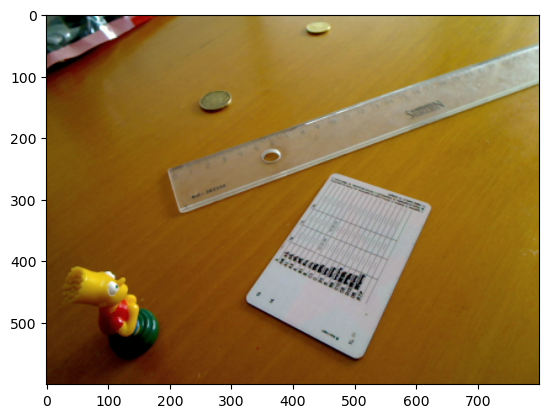

In [2]:
img = readrgb('../images/coins.png')

plt.imshow(img);

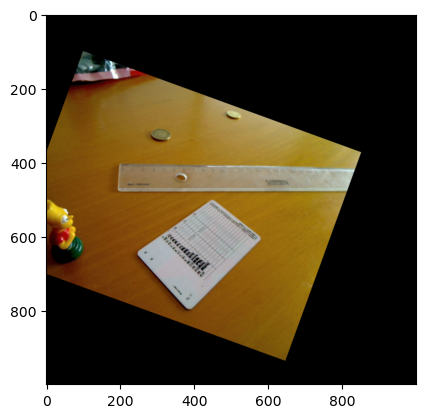

In [7]:
rec = cv.warpPerspective(
    img,                                # imagen de entrada
    desp((100,100)) @ rot3(20*degree),  # homografía (matriz 3x3)
    (1000,1000))                          # tamaño de la imagen resultante

plt.imshow(rec);

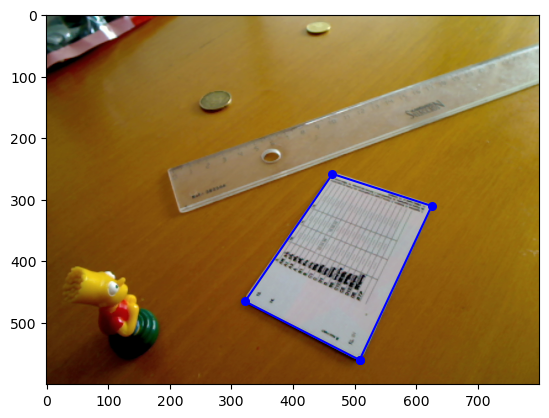

In [15]:
view = np.array([
    [508,560],
    [322,465],
    [464,258],
    [625,310]])

plt.imshow(img);
shcont(view);

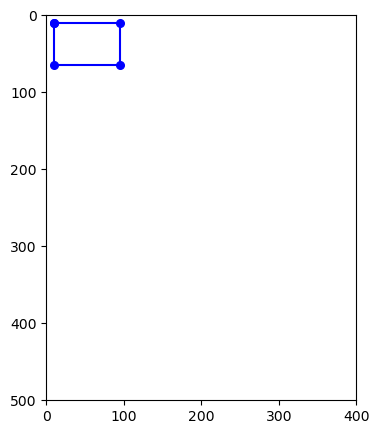

In [26]:
real = np.array([
    [  10.,   10.],
    [ 95.,   10.],
    [ 95.,  65.],
    [  10.,  65.]])

fig(4,5); shcont(real); plt.axis([0,400,500,0]);

In [24]:
H,_ = cv.findHomography(view, real)

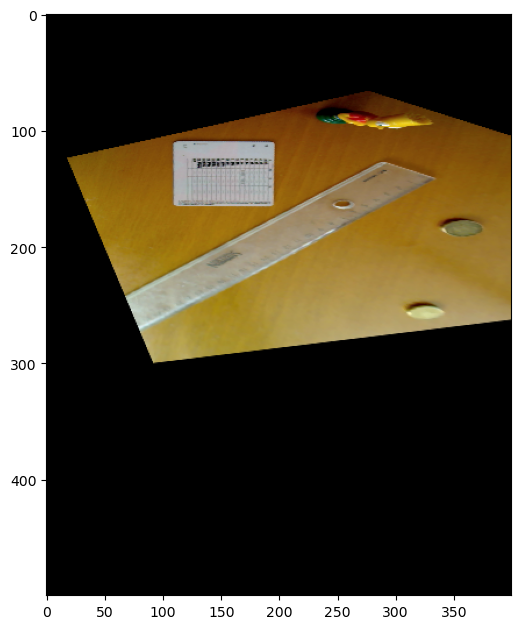

In [25]:
rec = cv.warpPerspective(img,H,(400,500))


fig(6,8)
plt.imshow(rec);

In [40]:
import cv2
import numpy as np

def cargar_referencias(nombre_archivo):
    referencias = []
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            x, y, u, v = map(float, linea.strip().split(','))
            referencias.append(((x, y), (u, v)))
    return referencias

def obtener_transformacion(referencias):
    puntos_imagen = np.float32([p_real for p_real, _ in referencias])
    puntos_reales = np.float32([p_imagen for _, p_imagen in referencias])
    M, _ = cv2.findHomography(puntos_imagen, puntos_reales)
    return M

def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        params.append((x, y))
        if len(params) == 2:
            img_rectificada = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
            p1_rectificado = cv2.perspectiveTransform(np.float32([[params[0]]]), M)[0][0]
            p2_rectificado = cv2.perspectiveTransform(np.float32([[params[1]]]), M)[0][0]
            distancia = np.linalg.norm(p1_rectificado - p2_rectificado)
            print(f'Distancia entre los puntos: {distancia:.2f} unidades')
            params.clear()

referencias = cargar_referencias('ref.txt')
M = obtener_transformacion(referencias)

img = cv2.imread('../images/coins.png   ')
img_rectificada = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

cv2.namedWindow('Imagen original')
cv2.namedWindow('Imagen rectificada') # Añadir esta línea para crear una ventana de la imagen rectificada
cv2.setMouseCallback('Imagen original', click_event, [])

while True:
    cv2.imshow('Imagen original', img)
    cv2.imshow('Imagen rectificada', img_rectificada) # Añadir esta línea para mostrar la imagen rectificada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


Distancia entre los puntos: 10.35 unidades
Distancia entre los puntos: 10.22 unidades
Distancia entre los puntos: 3.07 unidades


**RA**. Crea un efecto de realidad aumentada en el que el usuario interactúe con los objetos virtuales. Por ejemplo, haciendo que un objeto se desplace hacia un punto señalado con el ratón.